# Explainability  
This notebook tests how the model reacts to manipulation in images. 
For example when you remove the logo of a watch. 

In [17]:
from fastai.vision.all import *
from torchvision.models import *

from utils import *
import sys

import pickle
import dill

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
with open('models/M3_RN_ds3.pickle', 'rb') as f:
    learn = pickle.load(f)
    
learn = dill.loads(learn)

In [33]:
def visualize_manipulation(model, image_path, manipulated_image_path):
    
    actual_prediction = int(learn.predict(image_path)[1])
    manipulated_prediction = int(learn.predict(manipulated_image_path)[1])
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
    axes[0].imshow(mpimg.imread(image_path))
    axes[0].set_title(f"Original: {actual_prediction}$")
    axes[1].imshow(mpimg.imread(manipulated_image_path))
    axes[1].set_title(f"Manipulated: {manipulated_prediction}$")
    fig.suptitle("Predicted Prices for original and manipulated image")
    fig.tight_layout()
    plt.show()

### Removing all Brand names

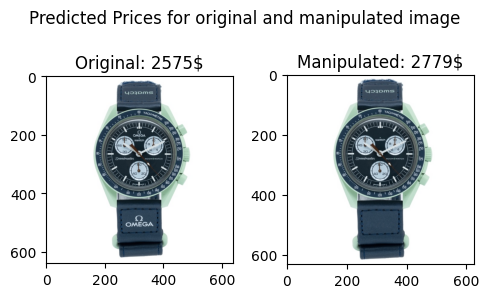

In [36]:
visualize_manipulation(learn, "imgs" + '/MG4243S.jpg', "imgs" + '/MG4243S_manipulated.jpg')

For a Omega X Swatch Collaboration it is interesting to see that the model predicts a higher price without the logo.

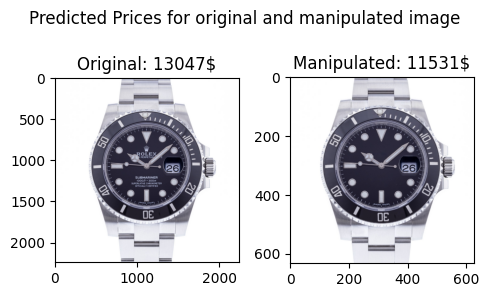

In [37]:
visualize_manipulation(learn, "imgs/10-10-ROL-91XU8K.jpg", "imgs/10-10-ROL-91XU8K_manipulated.jpg")

This result makes more sense, with the removal of the Rolex logo the watch loses about 1500 dollars in value. 

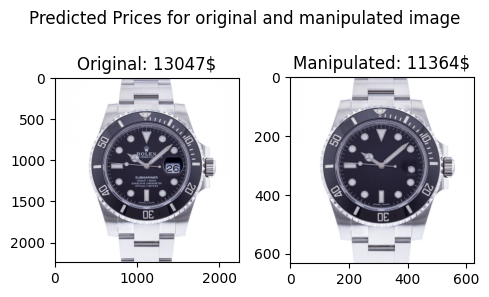

In [38]:
visualize_manipulation(learn, "imgs/10-10-ROL-91XU8K.jpg", "imgs/10-10-ROL-91XU8K_manipulated2.jpg")

If we also remove the day display, the watch will be about 200 dollars cheaper compared to the watch without logos.  

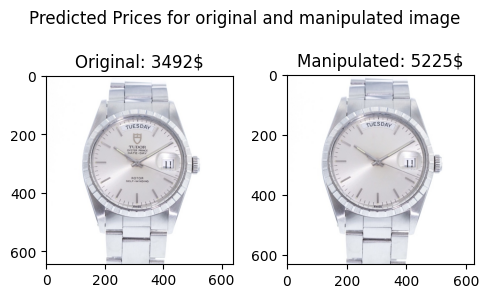

In [43]:
visualize_manipulation(learn, "imgs/tudor.jpg", "imgs/tudor_manipulated.jpg")

When removing the label on a Tudor, the price becomes higher, probably because it now looks more like a Rolex DayDate.

## Let's see what happens when we replace the Tudor Logo with a Rolex logo

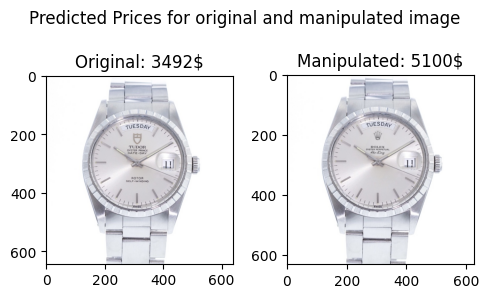

In [44]:
visualize_manipulation(learn, "imgs/tudor.jpg", "imgs/tudor_manipulated2.jpg")

As expected the price is higher with the Rolex Logo, but it is interesting that the watch without the Logo is the most expensive one.